# EDA and Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats.mstats import winsorize

import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 3000)

In [3]:
pd.set_option('display.max_columns', 3000)

In [4]:
df = pd.read_csv("D:\Life Expectancy Data.csv")

In [5]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Treating Categorical Attributes


In [7]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing


In [8]:
obj_df["Country"].value_counts()

Kazakhstan                                              16
Libya                                                   16
Tajikistan                                              16
Paraguay                                                16
Latvia                                                  16
Kuwait                                                  16
Cuba                                                    16
Switzerland                                             16
Azerbaijan                                              16
Honduras                                                16
Niger                                                   16
Cabo Verde                                              16
Republic of Korea                                       16
Germany                                                 16
Mozambique                                              16
Gambia                                                  16
Djibouti                                                

In [9]:
df = df[df.Country != 'Saint Kitts and Nevis']
df = df[df.Country != 'Dominica']
df = df[df.Country != 'Palau']
df = df[df.Country != 'Monaco']
df = df[df.Country != 'Tuvalu']
df = df[df.Country != 'Niue']
df = df[df.Country != 'Marshall Islands']
df = df[df.Country != 'San Marino']
df = df[df.Country != 'Cook Islands']
df = df[df.Country != 'Nauru']

In [10]:
df["Country"].value_counts()

Kazakhstan                                              16
Tajikistan                                              16
Latvia                                                  16
Kuwait                                                  16
Cuba                                                    16
Switzerland                                             16
Azerbaijan                                              16
Niger                                                   16
Libya                                                   16
Cabo Verde                                              16
Germany                                                 16
Mozambique                                              16
Gambia                                                  16
Djibouti                                                16
Luxembourg                                              16
Ethiopia                                                16
Yemen                                                   

In [11]:
obj_df["Status"].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [12]:
cleanup_nums = {"Status": {"Developing": 0,"Developed": 1}}

In [13]:
df.replace(cleanup_nums, inplace=True)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Treating Column 

### Renaming column names

In [14]:
orig_cols = list(df.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
df.columns = new_cols

In [15]:
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Descriptive Statistics

In [16]:
df.describe().iloc[:, 1:]

,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2928.000000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,0.174863,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,0.379915,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,0.000000,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,0.000000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,0.000000,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Treating Null Values

In [17]:
df.isnull().sum()*100/df.isnull().count()

country                             0.000000
year                                0.000000
status                              0.000000
life_expectancy                     0.000000
adult_mortality                     0.000000
infant_deaths                       0.000000
alcohol                             6.591530
percentage_expenditure              0.000000
hepatitis_b                        18.886612
measles                             0.000000
bmi                                 1.092896
under-five_deaths                   0.000000
polio                               0.648907
total_expenditure                   7.718579
diphtheria                          0.648907
hiv/aids                            0.000000
gdp                                15.129781
population                         21.994536
thinness_1-19_years                 1.092896
thinness_5-9_years                  1.092896
income_composition_of_resources     5.464481
schooling                           5.464481
dtype: flo

### Median Imputation to Null Values 

In [18]:
imputed_data = []
for year in list(df.year.unique()):
    year_data = df[df.year == year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().median()).copy()
    imputed_data.append(year_data)
df = pd.concat(imputed_data).copy()

In [19]:
df.isnull().sum()*100/df.isnull().count().copy()

country                            0.0
year                               0.0
status                             0.0
life_expectancy                    0.0
adult_mortality                    0.0
infant_deaths                      0.0
alcohol                            0.0
percentage_expenditure             0.0
hepatitis_b                        0.0
measles                            0.0
bmi                                0.0
under-five_deaths                  0.0
polio                              0.0
total_expenditure                  0.0
diphtheria                         0.0
hiv/aids                           0.0
gdp                                0.0
population                         0.0
thinness_1-19_years                0.0
thinness_5-9_years                 0.0
income_composition_of_resources    0.0
schooling                          0.0
dtype: float64

### Treating Outliers

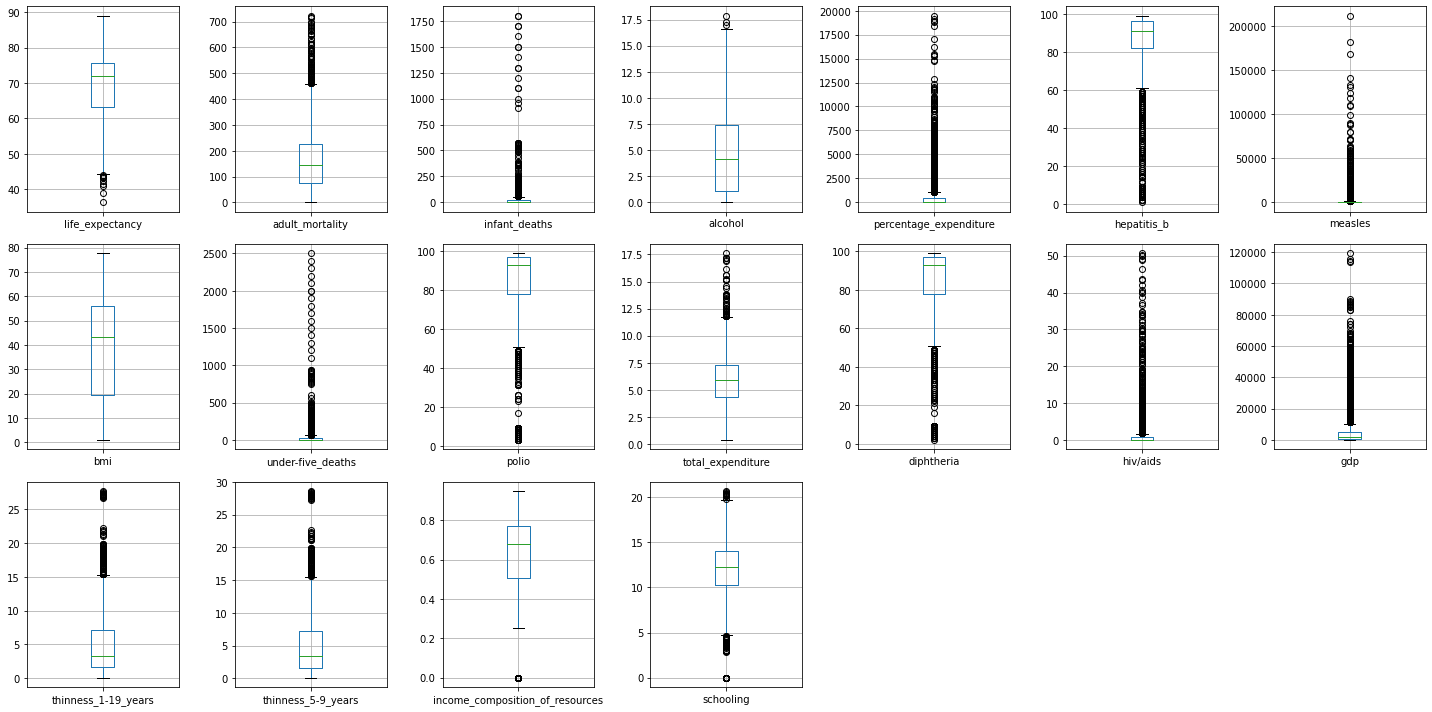

In [20]:
plt.figure(figsize=(20,10))
for i, col in enumerate(['life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'], start=1):
    plt.subplot(3,7,i)
    df.boxplot(col)
    plt.tight_layout()

#### No of outliers based on their 1.5 IQR

In [21]:
def outlier_count(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [22]:
cont_vars = list(df.columns)[3:]

In [23]:
for col in cont_vars:
    outlier_count(col)

---------------life_expectancy---------------
Number of outliers: 10
Percent of data that is outlier: 0.34%
---------------adult_mortality---------------
Number of outliers: 82
Percent of data that is outlier: 2.8%
---------------infant_deaths---------------
Number of outliers: 315
Percent of data that is outlier: 10.76%
---------------alcohol---------------
Number of outliers: 3
Percent of data that is outlier: 0.1%
---------------percentage_expenditure---------------
Number of outliers: 388
Percent of data that is outlier: 13.25%
---------------hepatitis_b---------------
Number of outliers: 320
Percent of data that is outlier: 10.93%
---------------measles---------------
Number of outliers: 542
Percent of data that is outlier: 18.51%
---------------bmi---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------under-five_deaths---------------
Number of outliers: 394
Percent of data that is outlier: 13.46%
---------------polio---------------
Number of ou

### Treating outliers using winsorization

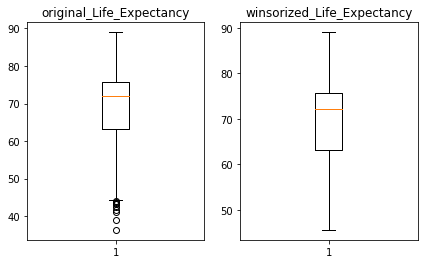

In [24]:
plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
original_Life_Expectancy = df['life_expectancy']
plt.boxplot(original_Life_Expectancy)
plt.title("original_Life_Expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(df['life_expectancy'],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.show()

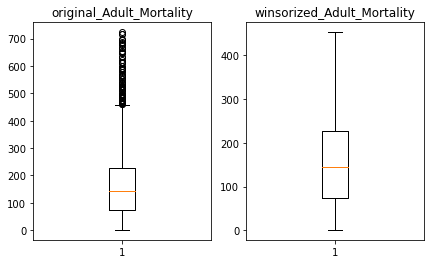

In [25]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
original_Adult_Mortality = df['adult_mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("original_Adult_Mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(df['adult_mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_Adult_Mortality")
plt.show()

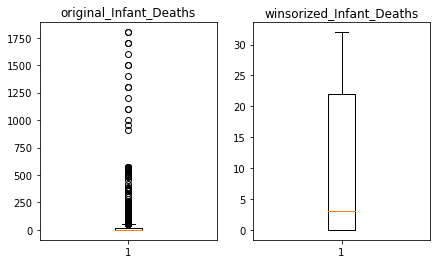

In [26]:

from scipy.stats.mstats import winsorize
plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
original_Infant_Deaths = df['infant_deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("original_Infant_Deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(df['infant_deaths'],(0,0.18))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.show()

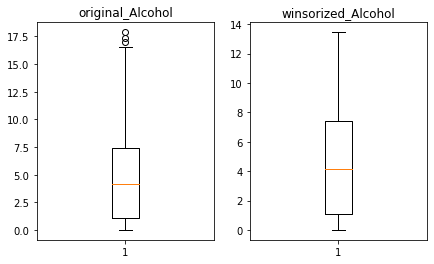

In [27]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
original_Alcohol = df['alcohol']
plt.boxplot(original_Alcohol)
plt.title("original_Alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(df['alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.show()

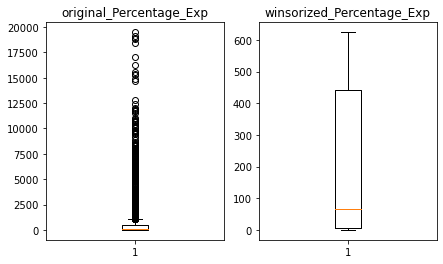

In [28]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
original_Percentage_Exp = df['percentage_expenditure']
plt.boxplot(original_Percentage_Exp)
plt.title("original_Percentage_Exp")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(df['percentage_expenditure'],(0,0.2))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.show()

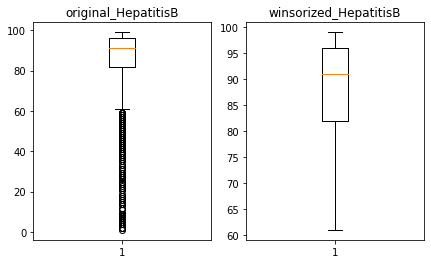

In [29]:
# Winsorize HepatitisB
from scipy.stats.mstats import winsorize
plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
original_HepatitisB = df['hepatitis_b']
plt.boxplot(original_HepatitisB)
plt.title("original_HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(df['hepatitis_b'],(0.11,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.show()

In [30]:
df = df.drop('measles',axis=1)

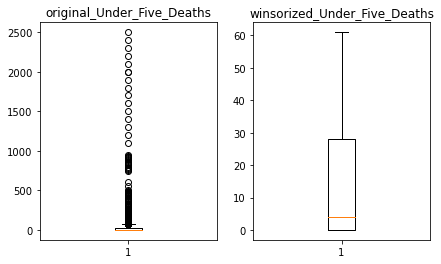

In [31]:
# Winsorize Under_Five_Deaths
from scipy.stats.mstats import winsorize
plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
original_Under_Five_Deaths = df['under-five_deaths']
plt.boxplot(original_Under_Five_Deaths)
plt.title("original_Under_Five_Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(df['under-five_deaths'],(0,0.15))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.show()

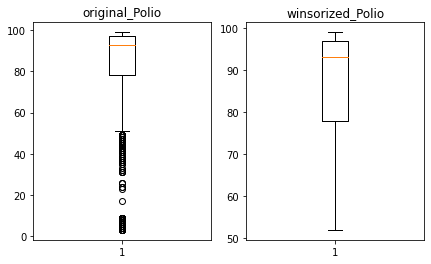

In [32]:
# Winsorize Polio
from scipy.stats.mstats import winsorize
plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
original_Polio = df['polio']
plt.boxplot(original_Polio)
plt.title("original_Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(df['polio'],(0.1,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.show()

Text(0.5, 1.0, 'winsorized_Tot_Exp')

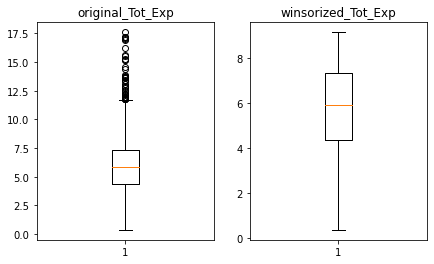

In [33]:
# Winsorize Tot_Exp
from scipy.stats.mstats import winsorize
plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
original_Tot_Exp = df['total_expenditure']
plt.boxplot(original_Tot_Exp)
plt.title("original_Tot_Exp")

plt.subplot(1,2,2)
winsorized_Tot_Exp = winsorize(df['total_expenditure'],(0,0.09))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

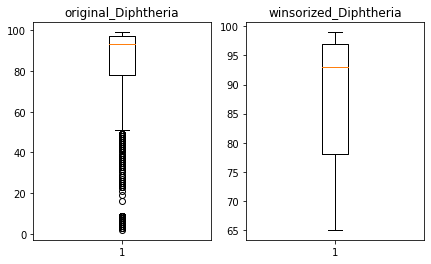

In [34]:
# Winsorize Diphtheria
from scipy.stats.mstats import winsorize
plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
original_Diphtheria = df['diphtheria']
plt.boxplot(original_Diphtheria)
plt.title("original_Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(df['diphtheria'],(0.15,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.show()

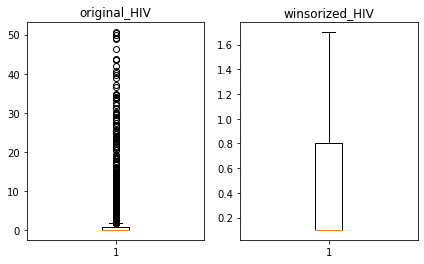

In [35]:
# Winsorize HIV/AIDS
from scipy.stats.mstats import winsorize
plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
original_HIV = df['hiv/aids']
plt.boxplot(original_HIV)
plt.title("original_HIV")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(df['hiv/aids'],(0,0.19))
plt.boxplot(winsorized_HIV)
plt.title("winsorized_HIV")

plt.show()

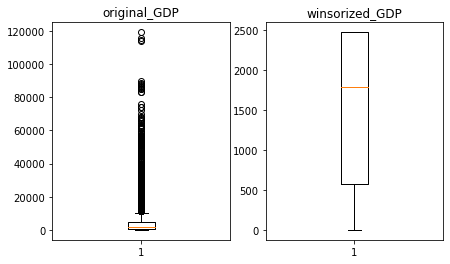

In [36]:
# Winsorize GDP
from scipy.stats.mstats import winsorize
plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
original_GDP = df['gdp']
plt.boxplot(original_GDP)
plt.title("original_GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(df['gdp'],(0,0.43))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.show()

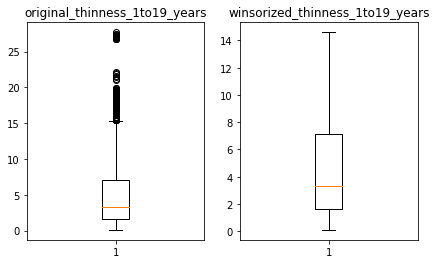

In [37]:
# Winsorize thinness_1to19_years
from scipy.stats.mstats import winsorize
plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
original_thinness_1to19_years = df['thinness_1-19_years']
plt.boxplot(original_thinness_1to19_years)
plt.title("original_thinness_1to19_years")

plt.subplot(1,2,2)
winsorized_thinness_1to19_years = winsorize(df['thinness_1-19_years'],(0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("winsorized_thinness_1to19_years")

plt.show()

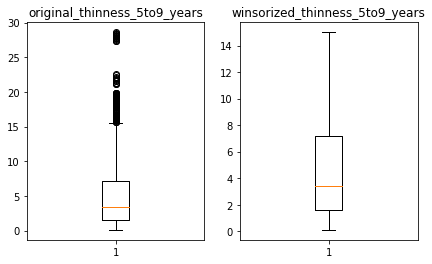

In [38]:
# Winsorize thinness_5to9_years
from scipy.stats.mstats import winsorize
plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
original_thinness_5to9_years = df['thinness_5-9_years']
plt.boxplot(original_thinness_5to9_years)
plt.title("original_thinness_5to9_years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(df['thinness_5-9_years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.show()

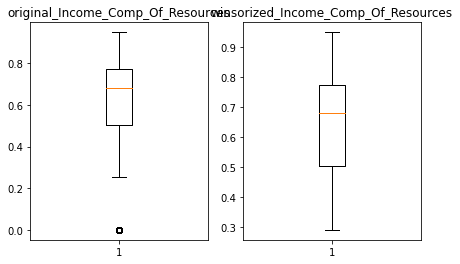

In [39]:
# Winsorize Income_Comp_Of_Resources
from scipy.stats.mstats import winsorize
plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = df['income_composition_of_resources']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("original_Income_Comp_Of_Resources")

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(df['income_composition_of_resources'],(0.05,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.show()

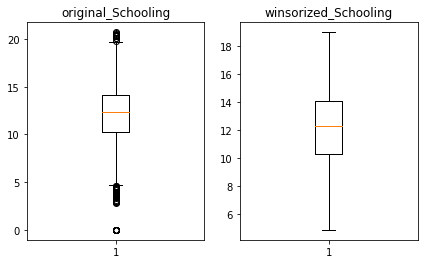

In [40]:
# Winsorize Schooling
from scipy.stats.mstats import winsorize
plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
original_Schooling = df['schooling']
plt.boxplot(original_Schooling)
plt.title("original_Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(df['schooling'],(0.025,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()

In [41]:
win_list = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,
            winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling]
for variable in win_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers after winsorization : {}".format(len(np.where((variable > max_val) | (variable < min_val))[0])))

Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0


In [42]:
# Adding winsorized variables to the data frame.
df['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
df['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
df['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
df['winsorized_Alcohol'] = winsorized_Alcohol
df['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
df['winsorized_HepatitisB'] = winsorized_HepatitisB
df['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
df['winsorized_Polio'] = winsorized_Polio
df['winsorized_Tot_Exp'] = winsorized_Tot_Exp
df['winsorized_Diphtheria'] = winsorized_Diphtheria
df['winsorized_HIV'] = winsorized_HIV
df['winsorized_GDP'] = winsorized_GDP
df['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
df['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
df['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
df['winsorized_Schooling'] = winsorized_Schooling

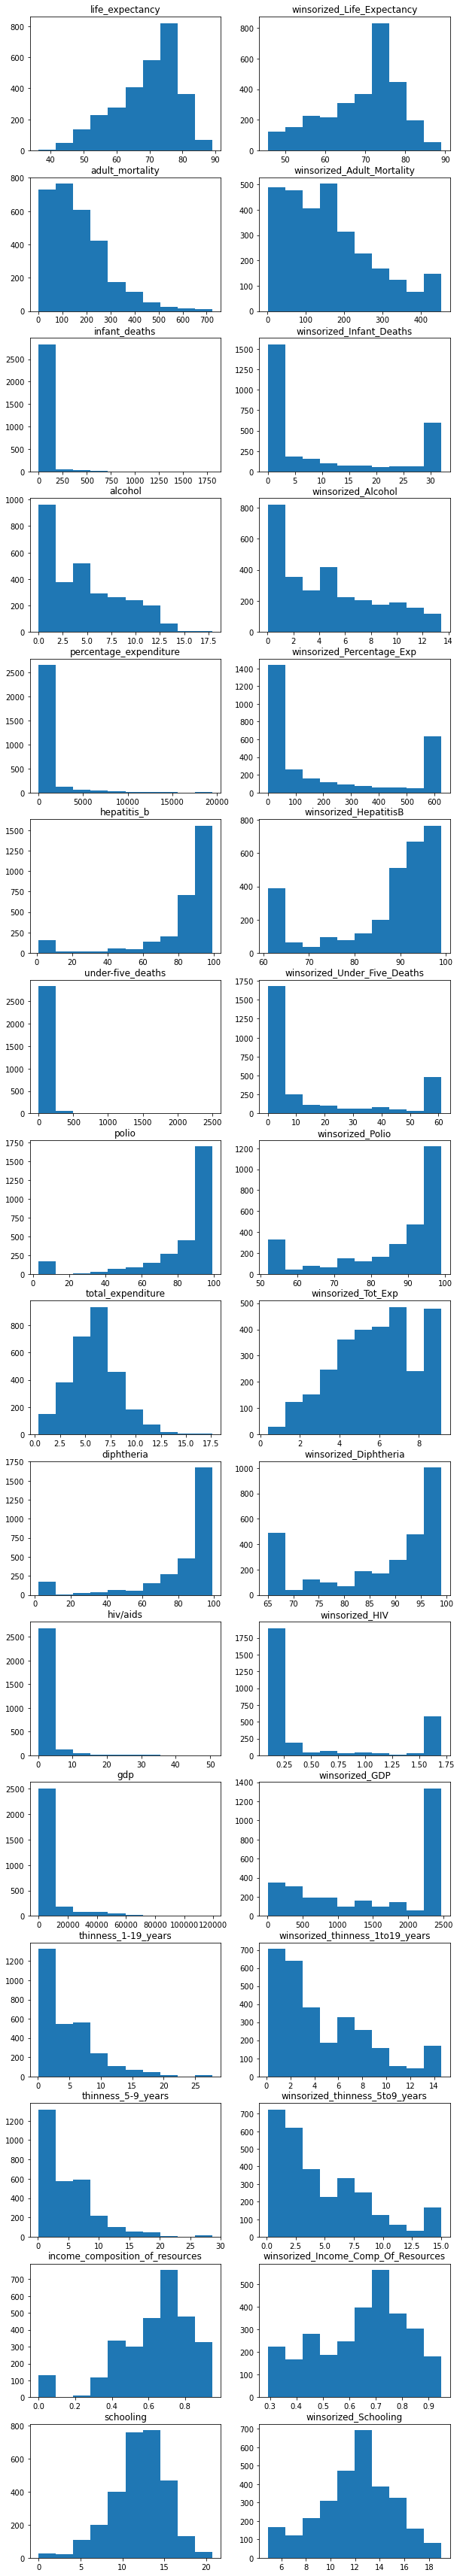

In [43]:
 # Distribution of each numerical variable.
all_col = ['life_expectancy','winsorized_Life_Expectancy','adult_mortality','winsorized_Adult_Mortality','infant_deaths',
    'winsorized_Infant_Deaths','alcohol','winsorized_Alcohol','percentage_expenditure','winsorized_Percentage_Exp','hepatitis_b',
         'winsorized_HepatitisB','under-five_deaths','winsorized_Under_Five_Deaths','polio','winsorized_Polio','total_expenditure',
         'winsorized_Tot_Exp','diphtheria','winsorized_Diphtheria','hiv/aids','winsorized_HIV','gdp','winsorized_GDP','thinness_1-19_years','winsorized_thinness_1to19_years','thinness_5-9_years',
         'winsorized_thinness_5to9_years','income_composition_of_resources','winsorized_Income_Comp_Of_Resources',
         'schooling','winsorized_Schooling']

plt.figure(figsize=(10,70))

for i in range(len(all_col)):
    plt.subplot(18,2,i+1)
    plt.hist(df[all_col[i]])
    plt.title(all_col[i])

plt.show()

### Plotting Average Life Expectancy vs Country

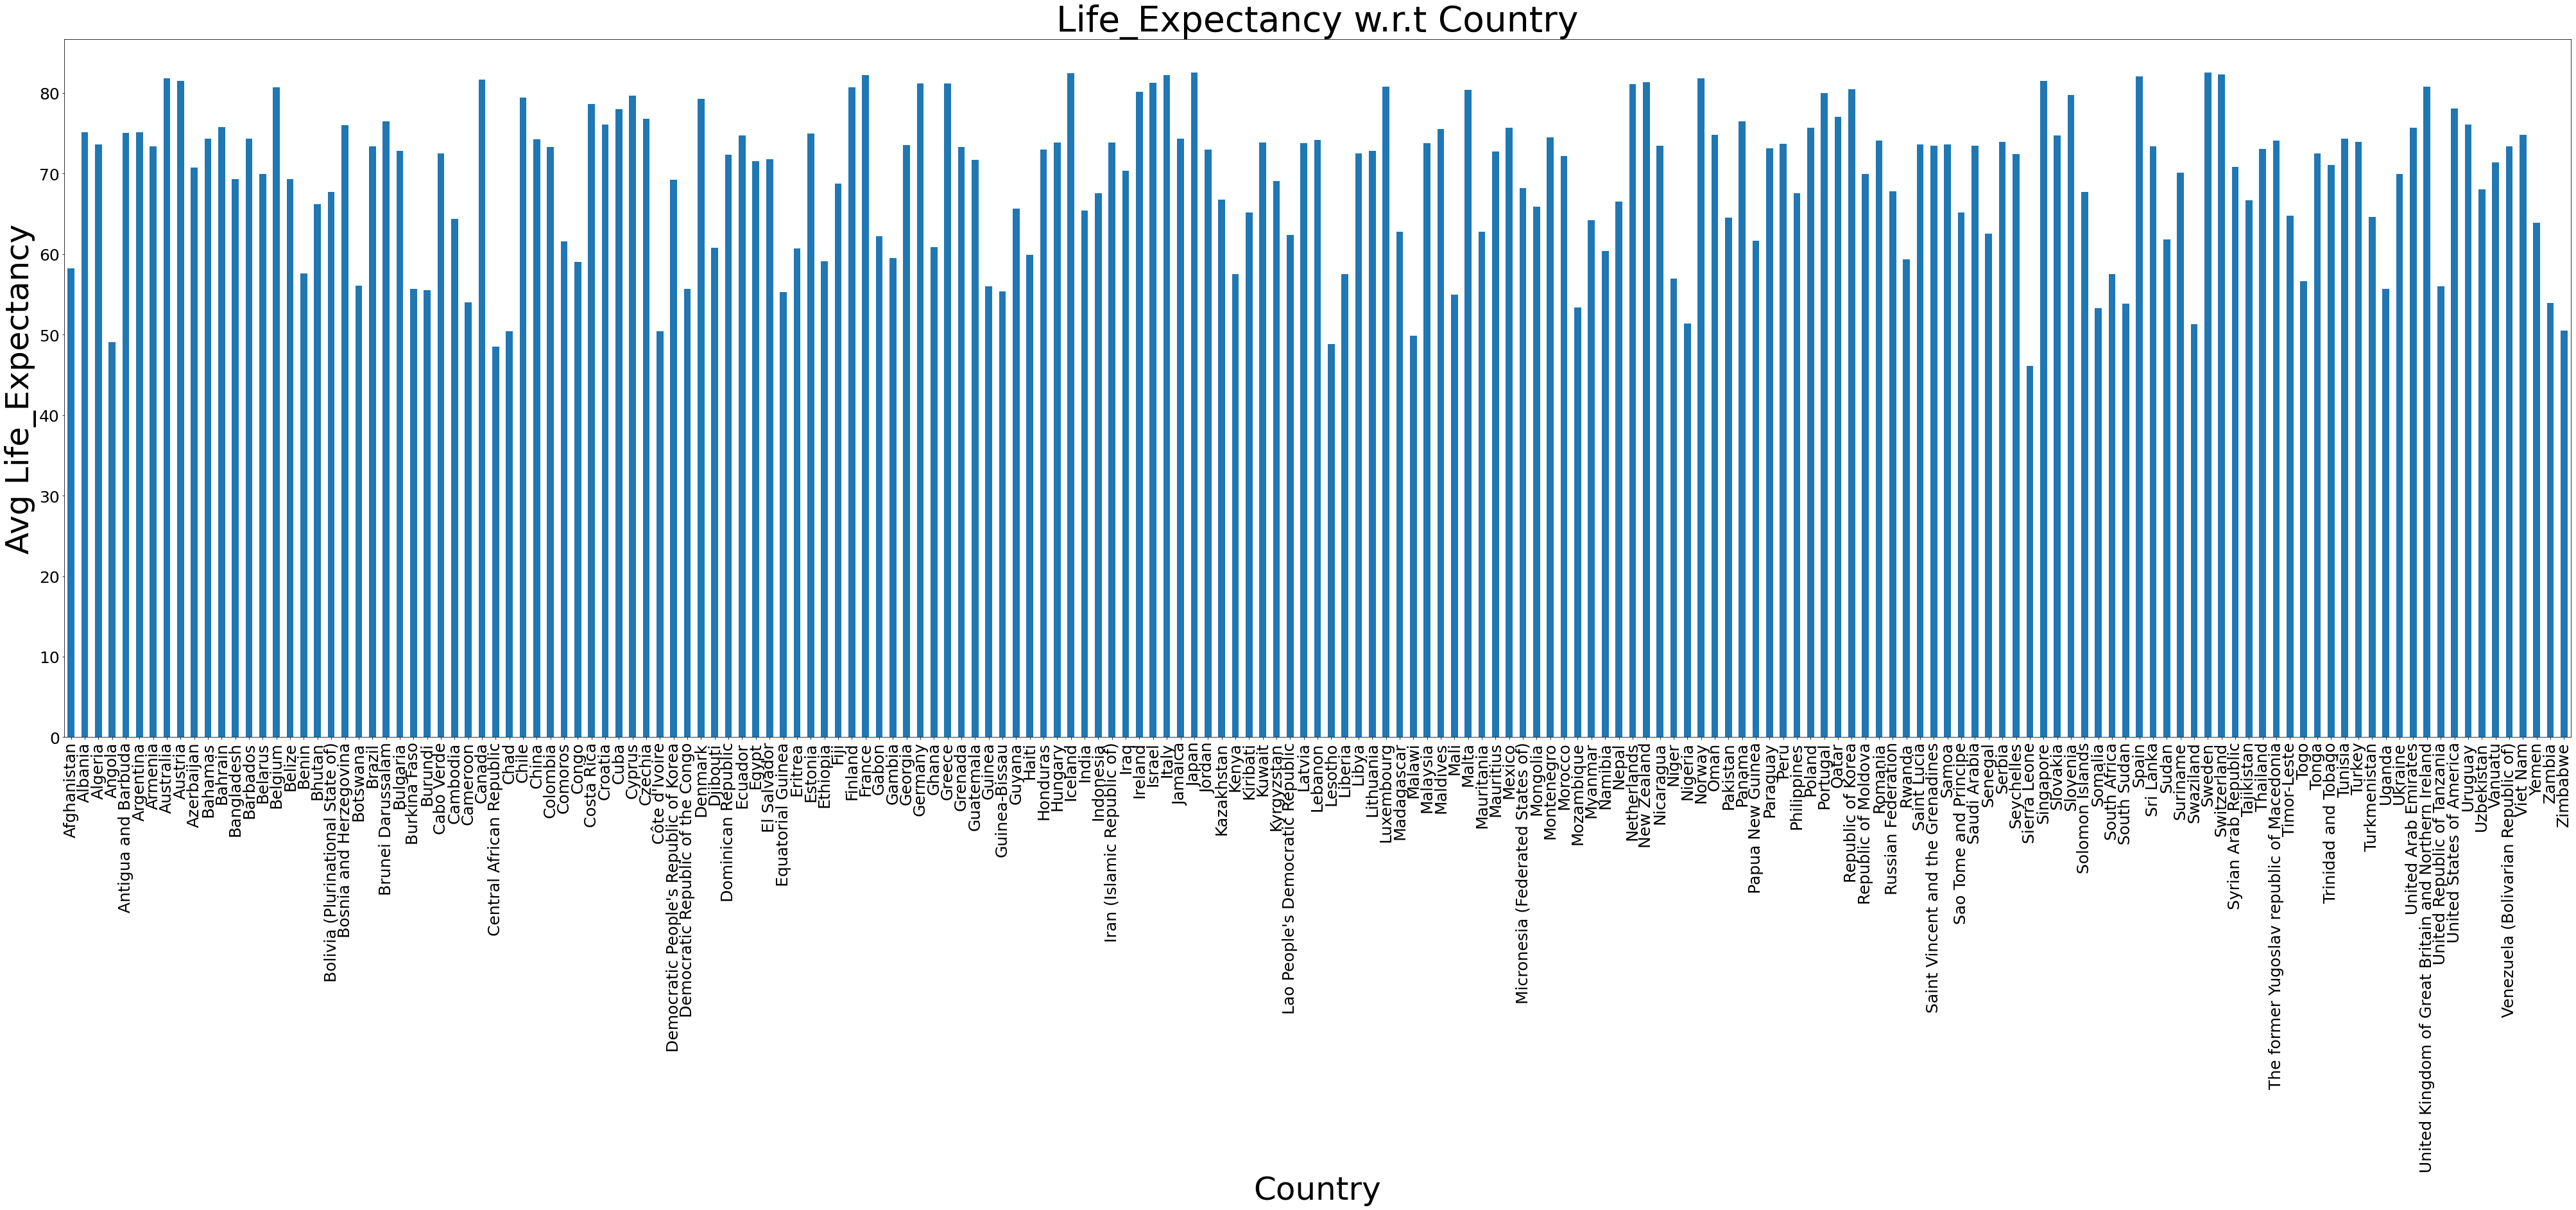

In [44]:
df_country = df.groupby('country')['life_expectancy'].mean()
df_country.plot(kind='bar', figsize=(70,20), fontsize=25)
plt.title("Life_Expectancy w.r.t Country",fontsize=55)
plt.xlabel("Country",fontsize=50)
plt.ylabel("Avg Life_Expectancy",fontsize=50)
plt.show()

### Plotting Average Life Expectancy vs Year

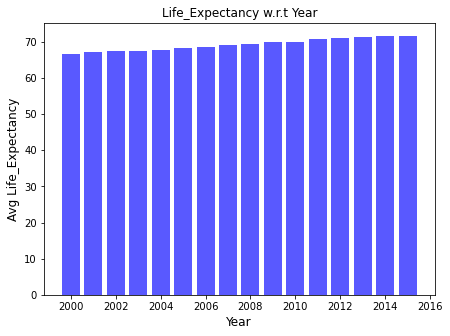

In [45]:
plt.figure(figsize=(7,5))
plt.bar(df.groupby('year')['year'].count().index,df.groupby('year')['life_expectancy'].mean(),color='blue',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

### Plotting Average Life Expectancy vs Status

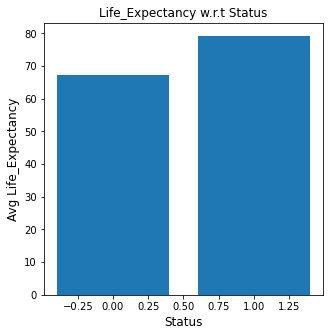

In [46]:
plt.figure(figsize=(5,5))
plt.bar(df.groupby('status')['status'].count().index,df.groupby('status')['life_expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()

### Scatter plot between the target variable(winsorized variables) and all continuous variables.

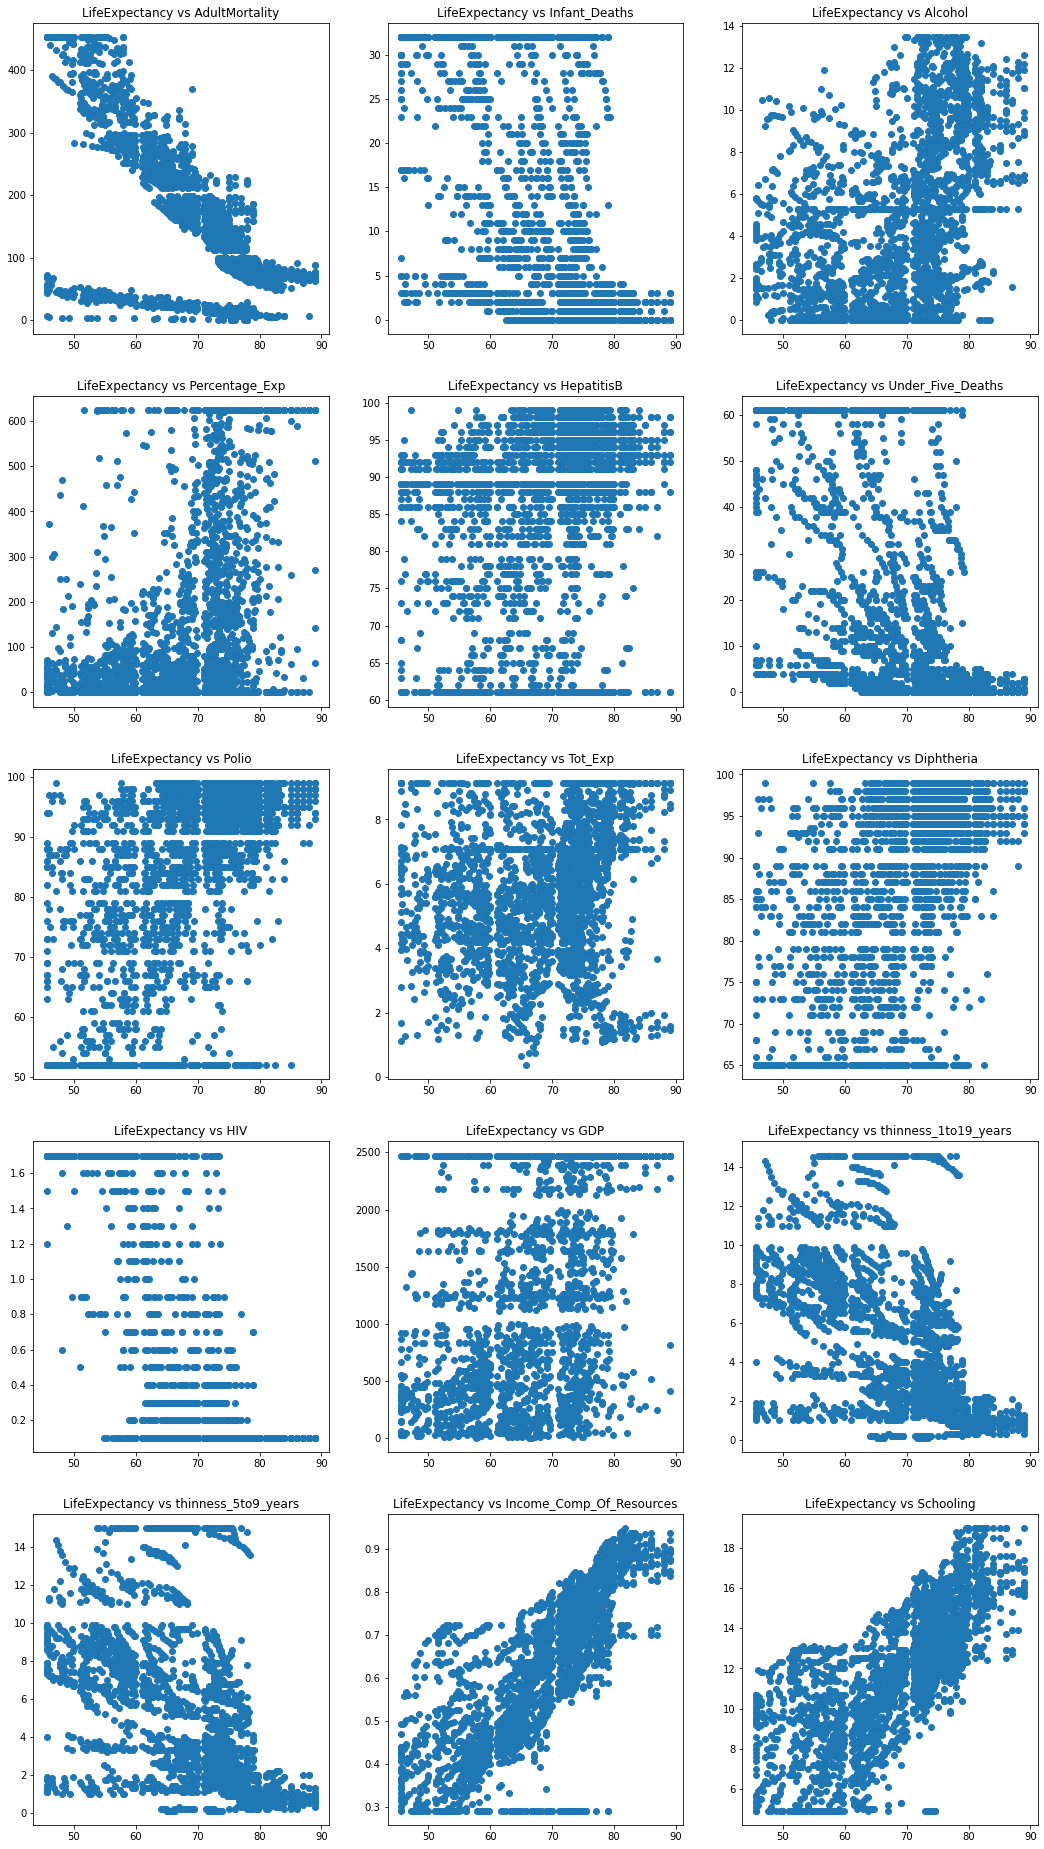

In [47]:
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Adult_Mortality"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Infant_Deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Alcohol"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Percentage_Exp"])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(6,3,5)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_HepatitisB"])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,6)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Under_Five_Deaths"])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(6,3,7)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Polio"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,8)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Tot_Exp"])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,9)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Diphtheria"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,10)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_HIV"])
plt.title("LifeExpectancy vs HIV")

plt.subplot(6,3,11)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_GDP"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,12)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_thinness_1to19_years"])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(6,3,13)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_thinness_5to9_years"])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(6,3,14)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Income_Comp_Of_Resources"])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,15)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Schooling"])
plt.title("LifeExpectancy vs Schooling")


plt.show()

#### Conclusions:
    1. Nature of scatter plot, we found approx same variation among following pairs,
      A. income_comp_of_resources and scooling 
      B. thinneess_5to9_years and thinness_1to19_years
      C. Under_five_death and infant_death

### Identifying Correlation and plotting heat map

In [48]:
# Correlation of winsorized variables
df_win = df.iloc[:,21:]
df_win['country'] = df['country']
df_win['year'] = df['year']
df_win['status'] = df['status']
df_win_num = df_win.iloc[:,:-3]
cormat = df_win_num.corr()

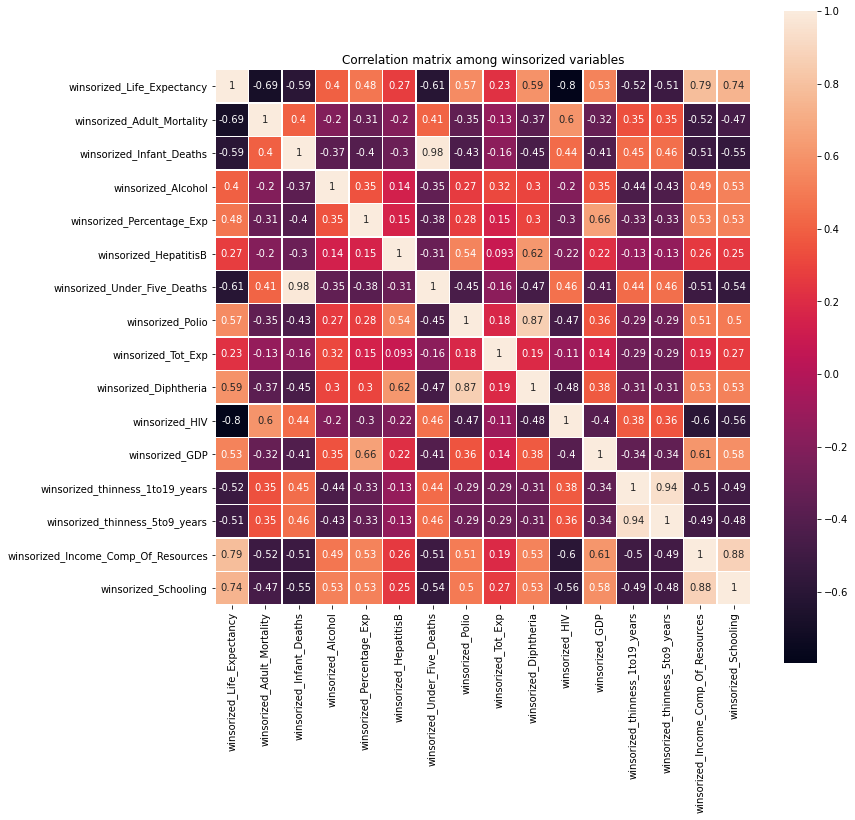

In [49]:
# Using heatmap to observe correlations
plt.figure(figsize=(12,12))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among winsorized variables")
plt.show()

### Conclusions
        1. Based on the heat map above, we found correlation factor of 0.98, 0.94 and 0.88 for under_five_death vs infant_death, thinness_5to9_deaths vs thinness_1to19_deaths and income_comp_of_resources vs scooling respectively.
        2. Same behaviour was observed in scatter plot also.
        3. We've planned to drop one of the two attributes (based on more null values observed)  that are having same behaviour towards target attibute
           A. under_five_death among under_five_death vs infant_death
           B. thinness_5to9_deaths among thinness_5to9_deaths vs thinness_1to19_deaths
           C. income_comp_of_resources among income_comp_of_resources vs scooling
        4. Our final dataset will be having 2928 rows and 18 columns

# Model Part

In [68]:
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.010,71.279624,65.0,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0,263.0,32,0.010,71.279624,65.0,61,52.0,8.16,65.0,0.1,584.259210,14.6,15.0,0.479,10.1
16,Albania,2015,0,77.8,74.0,0,4.600,364.975229,99.0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8,74.0,0,4.600,364.975229,99.0,0,99.0,6.00,99.0,0.1,2472.197831,1.2,1.3,0.762,14.2
32,Algeria,2015,0,75.6,19.0,21,5.285,0.000000,95.0,59.5,24,95.0,7.08,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6,19.0,21,5.285,0.000000,95.0,24,95.0,7.08,95.0,0.1,2472.197831,6.0,5.8,0.743,14.4
48,Angola,2015,0,52.4,335.0,66,5.285,0.000000,64.0,23.3,98,7.0,7.08,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4,335.0,32,5.285,0.000000,64.0,61,52.0,7.08,65.0,1.7,2472.197831,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,0,76.4,13.0,0,5.285,0.000000,99.0,47.7,0,86.0,7.08,99.0,0.2,13566.954100,2076086.0,3.3,3.3,0.784,13.9,76.4,13.0,0,5.285,0.000000,99.0,0,86.0,7.08,99.0,0.2,2472.197831,3.3,3.3,0.784,13.9


### Dropping three attributes based on their correlation with other three attributes

In [69]:
X = df[['winsorized_Adult_Mortality',
        'winsorized_Alcohol', 'winsorized_Percentage_Exp', 'winsorized_HepatitisB',
       'winsorized_Under_Five_Deaths', 'winsorized_Polio',
       'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV',
       'winsorized_GDP', 'winsorized_thinness_5to9_years',
       'winsorized_Income_Comp_Of_Resources','status']]

Y = df['winsorized_Life_Expectancy']

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
#we are not using random_state variable to ensure split is being done randomly

#### Decision Tree Regressor

In [72]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,Y_train)

DecisionTreeRegressor()

In [73]:
y_pred = tree_reg.predict(X_test)
tree_r2_score = r2_score(Y_test,y_pred)
print('R2 score for this model is', tree_r2_score)
print('MSE',mean_squared_error(Y_test, y_pred))

R2 score for this model is 0.9170849110845044
MSE 7.381877133105803


#### Linear Regression 

In [74]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [75]:
Y_pred = lr.predict(X_test)

In [76]:
print('R2 score for this model is',r2_score(Y_test, Y_pred))
print('MSE',mean_squared_error(Y_test, Y_pred))

R2 score for this model is 0.860401625627829
MSE 12.428353645582202


#### Random Forest Regressor


In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
rf = RandomForestRegressor()

In [79]:
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [80]:
rf_pred=rf.predict(X_test)

In [81]:
r3 = r2_score(Y_test, rf_pred)

In [82]:
print('R2 score for this model is', r3)
print('MSE',mean_squared_error(Y_test, rf_pred))

R2 score for this model is 0.9633972083240585
MSE 3.2587230432309404


In [83]:
rf.feature_importances_

array([1.24259617e-01, 1.39260057e-02, 4.78917580e-03, 4.16261479e-03,
       2.82511665e-02, 6.74363397e-03, 1.00823233e-02, 5.04308162e-03,
       5.80755140e-01, 3.52986889e-03, 1.65292934e-02, 2.01545639e-01,
       3.82439696e-04])

In [84]:
import seaborn as sns
# Helper function for plotting feature importance
def plot_features(columns, importances, n=10):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

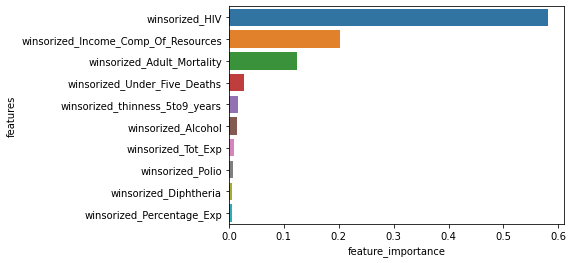

In [85]:
plot_features(X_train.columns, rf.feature_importances_)

### Conclusions:
1. We tried to fit our data in three different models namely Decision Tree, Linear Regression and Random Forest Regressor.
2. Among all three models, we achieved r2 value of 0.9633 in random forest regressor with mean square error of 3.25.
3. Feature importance of HIV attribute is highest among all other attributes as target attribute prediction.